In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv('arranged data - mental health.csv')
df.head()

,NO OF STUDENTS,GENDER,PERM\nISSIVE,AUTHOR\nITARIAN,AUTHOR\nITATIVE,EMOTIONAL MATURITY SCALE,MENTAL HEALTH PROFILE
0,1,MALE,30,25,40,59,33
1,2,MALE,29,27,38,78,36
2,3,MALE,26,40,21,103,14
3,4,MALE,24,38,29,140,20
4,5,MALE,27,23,39,72,35


In [78]:
df.columns

Index(['NO OF STUDENTS', 'GENDER', 'PERM\nISSIVE', 'AUTHOR\nITARIAN',
       'AUTHOR\nITATIVE', 'EMOTIONAL MATURITY SCALE', 'MENTAL HEALTH PROFILE'],
      dtype='object')

In [79]:
df.columns = ['number of students','Gender','Permissive','Authoritarian','Authoritative','Emotional Maturity Scale','Mental Health']
df.head()

,number of students,Gender,Permissive,Authoritarian,Authoritative,Emotional Maturity Scale,Mental Health
0,1,MALE,30,25,40,59,33
1,2,MALE,29,27,38,78,36
2,3,MALE,26,40,21,103,14
3,4,MALE,24,38,29,140,20
4,5,MALE,27,23,39,72,35


In [80]:
df['Emotional_Maturity']=pd.cut(df['Emotional Maturity Scale'],bins=[50,80,88,106,240],labels=['Extremely Stable','Moderately Stable','Unstable','Extremely Unstable'])

In [81]:
df.head()

,number of students,Gender,Permissive,Authoritarian,Authoritative,Emotional Maturity Scale,Mental Health,Emotional_Maturity
0,1,MALE,30,25,40,59,33,Extremely Stable
1,2,MALE,29,27,38,78,36,Extremely Stable
2,3,MALE,26,40,21,103,14,Unstable
3,4,MALE,24,38,29,140,20,Extremely Unstable
4,5,MALE,27,23,39,72,35,Extremely Stable


In [117]:
print(df['Permissive'].mean())
print(df['Authoritarian'].mean())
print(df['Authoritative'].mean())

27.686666666666667
30.886666666666667
29.093333333333334


In [266]:
rp.summary_cont(df['Emotional Maturity Scale'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Emotional Maturity Scale,150.0,105.8667,33.3069,2.7195,100.4929,111.2404


In [76]:
import researchpy as rp
rp.summary_cont(df['Permissive'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Permissive,150.0,27.6867,4.6777,0.3819,26.932,28.4414


In [134]:
rp.summary_cont(df['Permissive'].groupby(df['Emotional_Maturity']))

,N,Mean,SD,SE,95% Conf.,Interval
Emotional_Maturity,,,,,,
Extremely Stable,37,27.4595,3.3132,0.5447,26.3548,28.5641
Moderately Stable,30,32.8667,3.6553,0.6674,31.5018,34.2316
Unstable,26,29.1923,4.8002,0.9414,27.2535,31.1311
Extremely Unstable,57,24.4211,2.7642,0.3661,23.6876,25.1545


In [135]:
rp.summary_cont(df['Authoritarian'].groupby(df['Emotional_Maturity']))

,N,Mean,SD,SE,95% Conf.,Interval
Emotional_Maturity,,,,,,
Extremely Stable,37,26.2703,6.1312,1.0080,24.2260,28.3145
Moderately Stable,30,24.5000,2.9096,0.5312,23.4136,25.5864
Unstable,26,30.7308,6.8618,1.3457,27.9592,33.5023
Extremely Unstable,57,37.3158,3.2577,0.4315,36.4514,38.1802


In [136]:
rp.summary_cont(df['Authoritative'].groupby(df['Emotional_Maturity']))

,N,Mean,SD,SE,95% Conf.,Interval
Emotional_Maturity,,,,,,
Extremely Stable,37,35.8649,7.3226,1.2038,33.4234,38.3063
Moderately Stable,30,30.2000,2.8454,0.5195,29.1375,31.2625
Unstable,26,27.9231,5.0273,0.9859,25.8925,29.9537
Extremely Unstable,57,24.6491,3.1253,0.4140,23.8199,25.4784


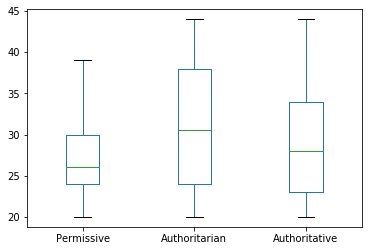

In [14]:
df.boxplot(column=['Permissive','Authoritarian','Authoritative'],grid=False)

In [158]:
df_melt = pd.melt(df, id_vars=['Emotional_Maturity'], value_vars=['Permissive','Authoritarian','Authoritative'])
df_melt.columns = ['Emotional Maturity','Parenting Type','Value']
df_melt.head()

,Emotional Maturity,Parenting Type,Value
0,Extremely Stable,Permissive,30
1,Extremely Stable,Permissive,29
2,Unstable,Permissive,26
3,Extremely Unstable,Permissive,24
4,Extremely Stable,Permissive,27


In [159]:
df_melt = pd.melt(df, id_vars=['Emotional_Maturity','Emotional Maturity Scale'], value_vars=['Permissive','Authoritarian','Authoritative'])
df_melt.columns = ['Emotional Maturity','emotional_maturity_scale','Parenting Type','Value']
df_melt.head()

,Emotional Maturity,emotional_maturity_scale,Parenting Type,Value
0,Extremely Stable,59,Permissive,30
1,Extremely Stable,78,Permissive,29
2,Unstable,103,Permissive,26
3,Extremely Unstable,140,Permissive,24
4,Extremely Stable,72,Permissive,27


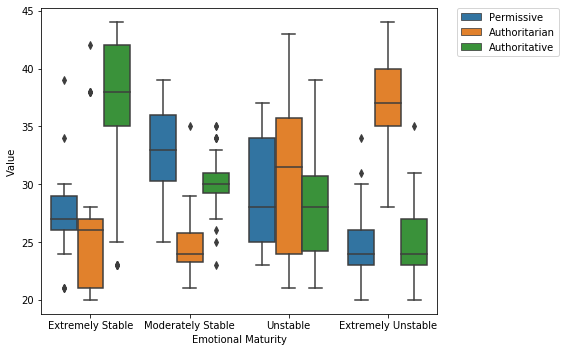

In [298]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Emotional Maturity", y="Value", hue="Parenting Type", data=df_melt)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig('sample.png')

In [162]:
# load packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
# C(Genotype):C(years) represent interaction term
model = ols('emotional_maturity_scale ~ C(Value)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table


,df,sum_sq,mean_sq,F,PR(>F)
C(Value),24.0,55664.85678,2319.369033,2.239205,0.000807
Residual,425.0,440215.14322,1035.800337,NaN,NaN


In [87]:
rp.summary_cont(df_melt['Value'].groupby(df_melt['Parenting_Type']))

,N,Mean,SD,SE,95% Conf.,Interval
Parenting_Type,,,,,,
Authoritarian,150,30.8867,7.2069,0.5884,29.7239,32.0494
Authoritative,150,29.0933,6.4707,0.5283,28.0493,30.1373
Permissive,150,27.6867,4.6777,0.3819,26.9320,28.4414


# Interpretation:
            The P-value obtained from ANOVA analysis for Emotional Maturity, Parenting Type, and interaction of Both are statistically significant (P<0.05).  So We conclude that Parenting Type significantly affects the Emotional Maturity

# Mental Health

In [121]:
df_mental = pd.melt(df, id_vars=['Mental Health'], value_vars=['Permissive','Authoritarian','Authoritative'])
df_mental.columns = ['Mental_Health','Parenting_Type','Value']
df_mental.head()

,Mental_Health,Parenting_Type,Value
0,33,Permissive,30
1,36,Permissive,29
2,14,Permissive,26
3,20,Permissive,24
4,35,Permissive,27


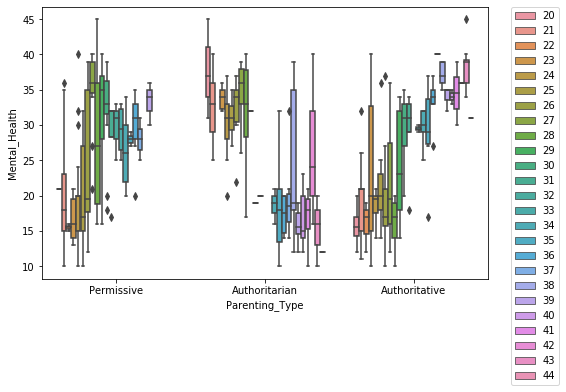

In [290]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Parenting_Type", y="Mental_Health",hue = 'Value', data=df_mental)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [100]:
model = ols('Mental_Health ~ C(Value)', data=df_mental).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table


,df,sum_sq,mean_sq,F,PR(>F)
C(Value),24.0,4166.168311,173.590346,2.342705,0.000407
Residual,425.0,31491.751689,74.098239,NaN,NaN


In [265]:
rp.summary_cont(df['Mental Health'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Mental Health,150.0,25.6533,8.9315,0.7293,24.2123,27.0943


In [146]:
rp.summary_cont(df_mental['Mental_Health'].groupby(df_mental['Parenting_Type']))

,N,Mean,SD,SE,95% Conf.,Interval
Parenting_Type,,,,,,
Authoritarian,150,25.6533,8.9315,0.7293,24.2123,27.0943
Authoritative,150,25.6533,8.9315,0.7293,24.2123,27.0943
Permissive,150,25.6533,8.9315,0.7293,24.2123,27.0943


# Correlation

In [167]:
df.corr()

,number of students,Permissive,Authoritarian,Authoritative,Emotional Maturity Scale,Mental Health
number of students,1.000000,-0.022011,0.068473,-0.138299,0.046914,-0.021326
Permissive,-0.022011,1.000000,-0.594519,0.206961,-0.467095,0.435289
Authoritarian,0.068473,-0.594519,1.000000,-0.701505,0.700348,-0.707218
Authoritative,-0.138299,0.206961,-0.701505,1.000000,-0.587501,0.651924
Emotional Maturity Scale,0.046914,-0.467095,0.700348,-0.587501,1.000000,-0.784416
Mental Health,-0.021326,0.435289,-0.707218,0.651924,-0.784416,1.000000


In [244]:
df1 = pd.DataFrame(df['Emotional Maturity Scale'],df['Mental Health']).reset_index()

In [246]:
df1.columns = ['mental_health','emotional_maturity_scale']
df1.head()

,mental_health,emotional_maturity_scale
0,33,125
1,36,78
2,14,76
3,20,85
4,35,146


In [247]:
df1.corr()

,mental_health,emotional_maturity_scale
mental_health,1.00000,-0.09853
emotional_maturity_scale,-0.09853,1.00000


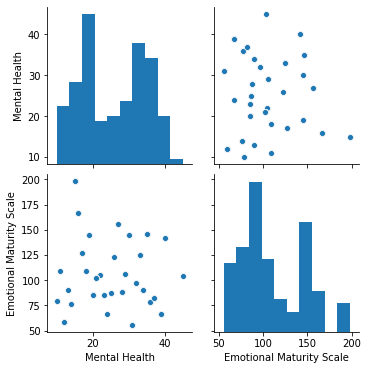

In [185]:
sns.pairplot(df1)

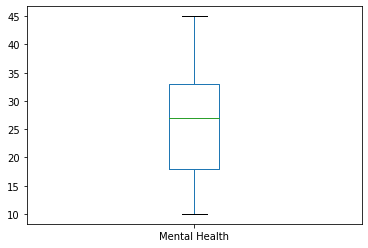

In [186]:
df.boxplot(column=['Mental Health'],grid=False)

In [187]:
df1.head()

,Mental Health,Emotional Maturity Scale
0,33,125
1,36,78
2,14,76
3,20,85
4,35,146


In [188]:
rp.summary_cont(df1['Mental Health'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Mental Health,150.0,25.6533,8.9315,0.7293,24.2123,27.0943


In [270]:
rp.summary_cont(df['Mental Health'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Mental Health,150.0,25.6533,8.9315,0.7293,24.2123,27.0943


In [189]:
rp.summary_cont(df1['Emotional Maturity Scale'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Emotional Maturity Scale,150.0,109.8333,36.1086,2.9483,104.0075,115.6591


In [207]:
df2 = pd.DataFrame(df['Emotional_Maturity'],df['Mental Health']).reset_index()
df2.head(20)

,Mental Health,Emotional_Maturity
0,33,Extremely Unstable
1,36,Extremely Stable
2,14,Extremely Stable
3,20,Moderately Stable
4,35,Extremely Unstable
5,27,Extremely Unstable
6,25,Moderately Stable
7,19,Extremely Unstable
8,20,Moderately Stable
9,37,Moderately Stable


In [213]:
code = {"Emotional_Maturity":     {"Extremely Stable": 1,
                                   "Moderately Stable": 2,
                                   "Unstable":3,
                                   "Extremely Unstable" : 4}}

df2.replace(code, inplace=True)
df2.head()

,Mental Health,Emotional_Maturity
0,33,4
1,36,1
2,14,1
3,20,2
4,35,4


In [236]:
df1.corr(method='pearson')

,Mental Health,Emotional Maturity Scale
Mental Health,1.00000,-0.09853
Emotional Maturity Scale,-0.09853,1.00000


In [223]:
import scipy.stats
scipy.stats.pearsonr(df2['Mental Health'], df2['Emotional_Maturity'])[0]

0.0030632578642073895

In [288]:
x = df1['x'].values
y = df1['y'].values
x

array([33, 36, 14, 20, 35, 27, 25, 19, 20, 37, 35, 24, 30, 26, 34, 23, 19,
       18, 20, 21, 28, 15, 16, 25, 45, 27, 17, 20, 22, 21, 17, 37, 27, 21,
       30, 16, 36, 32, 23, 37, 20, 16, 27, 34, 33, 18, 20, 29, 14, 25, 32,
       39, 35, 32, 30, 21, 21, 14, 36, 31, 29, 19, 18, 35, 39, 19, 19, 33,
       39, 14, 32, 33, 15, 14, 10, 40, 31, 36, 21, 20, 40, 36, 33, 12, 10,
       39, 36, 32, 32, 35, 39, 15, 12, 10, 11, 15, 20, 20, 13, 33, 39, 30,
       15, 15, 29, 17, 12, 40, 35, 20, 28, 20, 35, 30, 12, 39, 16, 18, 28,
       34, 32, 18, 19, 32, 12, 32, 27, 34, 36, 30, 32, 17, 20, 12, 35, 32,
       31, 17, 16, 36, 35, 19, 18, 37, 35, 10, 30, 33, 15, 20],
      dtype=int64)

In [233]:
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

<Figure size 576x360 with 0 Axes>

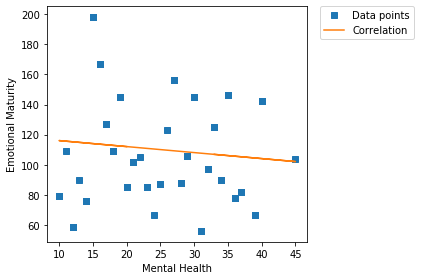

In [313]:
plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label='Correlation')
ax.set_xlabel('Mental Health')
ax.set_ylabel('Emotional Maturity')
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig('sample2.png')

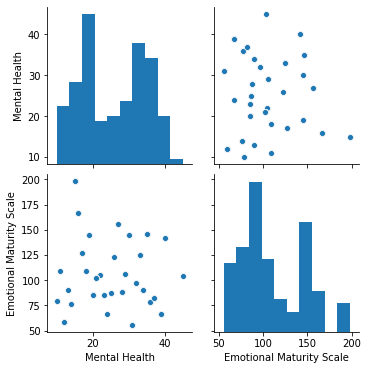

In [238]:
sns.pairplot(df1)

In [260]:
model = ols('mental_health ~ C(emotional_maturity_scale)', data=df1).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table


,df,sum_sq,mean_sq,F,PR(>F)
C(emotional_maturity_scale),25.0,10855.198333,434.207933,52.234274,4.662313e-54
Residual,124.0,1030.775000,8.312702,NaN,NaN


In [256]:
stats.f_oneway(df1['mental_health'],df1['emotional_maturity_scale'])

F_onewayResult(statistic=768.2413726755112, pvalue=1.7491864703735616e-84)

In [261]:
df_gender = pd.melt(df, id_vars=['Gender','Emotional_Maturity','Emotional Maturity Scale'], value_vars=['Permissive','Authoritarian','Authoritative'])
df_gender.columns = ['Gender','Emotional Maturity','emotional_maturity_scale','Parenting Type','Value']
df_gender.head()

,Gender,Emotional Maturity,emotional_maturity_scale,Parenting Type,Value
0,MALE,Extremely Stable,59,Permissive,30
1,MALE,Extremely Stable,78,Permissive,29
2,MALE,Unstable,103,Permissive,26
3,MALE,Extremely Unstable,140,Permissive,24
4,MALE,Extremely Stable,72,Permissive,27


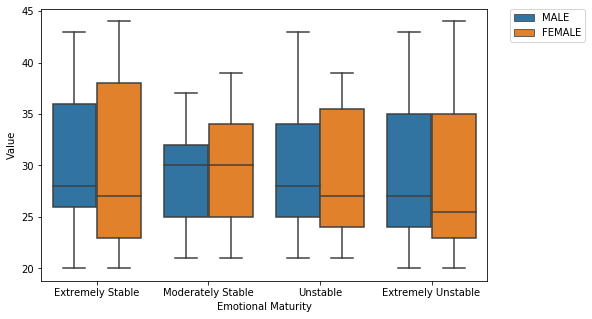

In [263]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Emotional Maturity", y="Value", hue="Gender", data=df_gender)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [275]:
df1.columns = ['x','y']
df1.head()

,x,y
0,33,125
1,36,78
2,14,76
3,20,85
4,35,146


In [280]:
print(np.sum(df1['x']))
print(np.sum(df1['y']))
print(np.sum(df1['x']**2))
print(np.sum(df1['y']**2))
print(np.sum(df1['x']* df1['y']))

3848
16475
110600
2003775
417904
